파이썬 머신러닝 완벽 가이드
# Chapter 04 분류
### 1. 분류의 개요

<지도학습과 분류(Classification)>
지도학습 : 레이블 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
분류(Classification) : 지도학습의 대표적인 유형. 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것. 즉 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것.

<분류 구현 알고리즘>
- 나이즈 베이즈 : 베이즈 통계와 생성모델에 기반
- 로지스틱 회귀 (Logistic Regression) : 독립변수와 종속변수의 선형 관계성에 기반
- 결정 트리 (Decision Tree) : 데이터 균일도에 따른 규칙 기반
- 서포트 벡터 머신 (Support Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
- 최소 근접 알고지름 (Nearest Neighbor) : 근접 거리를 기준
- 신경망 (Neural Network) : 심층 연결 기반
- 앙상블 (Ensemble) : 서로 다른(또는 같은) 머신러닝 알고리즘을 결합 =====> 이번장에서 많이 다룰 것

<앙상블 알고리즘>
분류에서 가장 각광받는 방법 중 하나. 이미지, 영상, 음성 등에는 신경망에 기반한 딥러닝이 머신러닝계를 선도하고 있지만, 이를 제외한 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능으로 많은 분석가와 데이터 과학자들에게 애용되고 있다.
- 배깅 (Bagging) : 대표방식은 랜덤 포레스트 (Random Forest)
- 부스팅 (Boosting) : 효시라고 할 수 있는 그래디언트 부스팅 (Gradient Boosting) 은 뛰어난 예측 성은을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 최적화 모델 튜닝이 어려웠다. 그러나 XgBoost 와 LightGBM 등 기존 예측 성능보다 높고 수행시간이 짧은 알고리즘이 등장. 이로 인해 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리 잡았다.
앙상블은 기본 알고리즘으로 일반적으로 결정트리를 사용한다.

<이 장에서 알아볼 것>
- 앙상블 방법의 개요
- 랜덤 포레스트
- 그래디언트 부스팅의 전통적인 앙상블 기법
- XgBoost, LightGBM, 스태킹 (Stacking) 기법

<결정트리의 장단점>
쉽고 유연하게 적용될 수 있는 알고리즘. 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 매우 적다. 그러나 예측 성능을 향상시키기 위해서 복잡한 규칙 구조를 가져야 하며, 이로 인해 반대로 예측 성능이 저하될 수도 있다.
그러나 앙상블에서는 오히려 이러한 단점이 장점으로 적용한다. 앙상블은 매우 많은 여러 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시키는데, 결정트리가 좋은 약한 학습기가 된다.

### 2. 결정트리

<결정트리의 특성>
- 결정트리 : 데이터에 있는 규칙을 학습을 통해 자동적으로 찾아내 트리 (Tree) 기반의 분류 규칙을 만드는 것이다.
- 일반적으로 규칙을 가장 쉽게 표현하는 방법 : if/else 기반으로 나타낸 것. 따라서 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.

<결정트리의 구조>
- 규칙 노드 (Decision Node) : 규칙 조건
- 리프 노드 (Leaf Node) : 결정된 클래스 값
- 서브 트리 (Sub Tree) : 새로운 규칙 조건마다 생성됨
- 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때 마다 규칙 노드가 만들어 진다.
- 그러나 많은 규칙이 있다는 것 : 분류를 결정하는 방식이 더욱 복잡해진다는 얘기 => 과적합 / 즉, 트리의 깊이가 깊어질수록 결정트리의 예측 성능이 저하될 가능성이 높다.
- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면, 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다. => 어떻게 트리를 분할 (split) 할 것인가가 중요하고, 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요.

<균일한 데이터 세트>
- 균일도 : 모두 검은공으로 구성되면 데이터가 모두 균일. 거기에 흰색 공이 들어가 있으면 균일도가 낮아짐
- 균일도의 중요성 : 데이터 세트의 균일도는 데이터를 구분하는데 필요한 정보의 양에 영향을 미친다. (아무거나 뽑아도 균일하면 검은공이라 추측가능)
- 결정노드의 규칙 조건 : 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 만듦
- 과정 :
균일도가 데이터 세트로 쪼개질 수 있도록 서브 데이터 세트 만듦 => 다시 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트로 쪼갬
- 전략 : 데이터 세트를 만들 때는, 균일도가 높은 데이터 셋 부터 조건을 만드는게 좋다. 이후에 나머지에 대해 균일도 조건을 찾아 분류하는 것이 효율적
- 균일도의 측정 : 엔트로피를 이용한 정보이득 지수, 지니계수 등 사용
- 정보이득 : 엔트로피 개념을 기반. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 즉 1-엔트로피 지수. 결정트리는 이 정보 이득 지수로 분할 기준을 정함. 정보 이득이 높은 속성을 기준으로 분할
- 지니계수 : 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0 이 가장 평등하고 1로 갈수록 불평등하다. 따라서 지니계수가 낮을수록 데이터 균일도가 높다.
- DecisionTreeClassifier 은 기본으로 지니 계수를 이용해 데이터 세트를 분할.
- 결정 트리의 일반적인 알고리즘 : 데이터 세트의 이득이 높거나, 지니계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정


<결정 트리 모델의 특징과 장단점>
1. '균일도' 라는 룰을 기반으로 하고 있기에 알고리즘이 쉽고 직관적이다
2. 룰이 명확하기 때문에 어떻게 규칙 노드와 리프 노드가 만들어 지는지 알 수 있고, 시각화로 표현도 할 수 있다
3. 정보의 균일도만 신경쓰면 되므로 특별한 경우 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없다.
4. 단점 : 과적합으로 정확도가 떨어진다. 왜냐하면 서브 트리를 계속 만들다 보면, 피처가 많고 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해진다. 즉. 학습 데이터 기반 모델의 정학도를 높이기 위해 계속해서 조건을 추가하면서 트리 깊이가 계속 커지고, 복잡한 학습 모델에 이르게 됨.

요약 : 쉽고, 직관적이고, 전처리 과정이 필요없지만, 과적합으로 알고리즘 성능이 떨어진다.

<결정 트리 파라미터>
- 사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier (분류를 위한 클래스) / DecisonTreeRegressor (회귀를 위한 클래스) 클래스를 제공한다.
- 사이킷런의 결정 트리 구현은 CART 알고리즘 기반이다. CART 는 분류 뿐 아니라 회귀에서도 사용될 수 있는 트리 알고리즘.
- DecisionTreeClassifier 와 DecisionTreeRegressor 은 다음과 같은 동일한 파라미터를 사용함.
- min_samples_split : 노드를 분할하기 위한

In [1]:
# 결정트리 시각화
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출결과로 out_file로 지정된 tree.dot파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot",
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True,
                filled=True)

import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

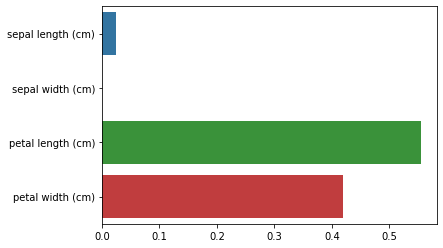

In [7]:
# 하이퍼 파라미터
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

# petal_length가 가장 피처 중요도가 높음

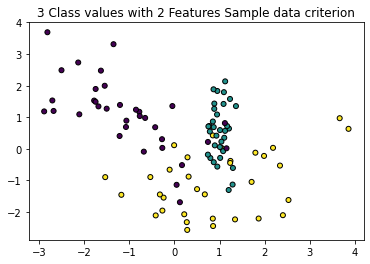

In [8]:
# 결정트리 과적합
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data criterion")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
# make_classification() : 분류를 위한 테스트용 데이터를 쉽게 만들수 있는 함수
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [9]:
def visualize_boundary(model, X, y):
    # 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타냄
    # 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해할 수 있게 해줌
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

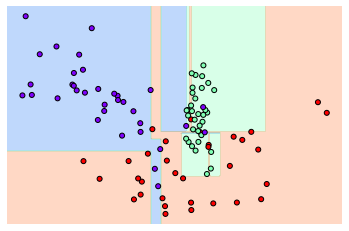

In [10]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

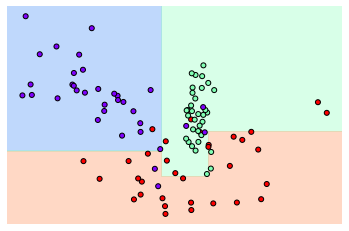

In [11]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

<앙상블 학습>
- 앙상블 학습(Ensemble Learning)을 통한 분류 : 여러 개의 분류기를 생성하고, 그 예측을 결합하여 정확한 최종 예측을 도출하는 기법으로, 다양한 분류기의 예측 결과를 결합함으로써 보다 정확한 최종 예측 도측
- 이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류는 앙상블이 뛰어난 성능
랜덤 포레스트, 그래디언트 부스팅 " 대표적인 앙상블 알고리즘. 뛰어난 성능과 쉬운 사용, 다양한 활용도
- XGBoost, LightGBM, Stacking 등 기존의 그래디언트 부스팅을 뛰어넘는 새로운 알고리즘들 개발
- 전통적으로 나눠지는 앙상블 학습의 유형 : Voting, Bagging, Boosting
- Voting과 Bagging은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
- 보팅은 일반적으로 서로 다른 알고리즘을 가진 분류기가 결합
- 배깅은 데이터 샘플링을 서로 다르게 하여 모두 같은 유형의 알고리즘을 기반으로 학습을 수행해 보팅 수행 (ex. 랜덤 포레스트)
- Bootstrapping 분할 방식 : 개별 Classifier에게 데이터를 샘플링해서 추출. 중첩 허용
- 부스팅은 여러 개의 Classifier가 순차적으로 학습을 수행하되, 앞에서 학습한 Classifier가 잘못 예측한 데이터에 대해서 올바르게 예측할 수 있다라고 가중치를 부여하여 다음 Classifier에서 학습과 예측을 진행
- 스태킹은 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과를 예측

In [12]:
# 보팅 분류기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# import data
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [13]:
# 개별모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft')
# voting의 default는 'hard'
# estimators는 리스트 값으로 보팅에 사용될 classifier 객체들을 튜플 형식으로 입력

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

# Voting 분류기의 정확도가 조금 높음

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


In [14]:
# 랜덤 포레스트
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당

    feature_name_df = pd.read_csv('C:/Users/Jaewon/ESAA/human_activity/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('C:/Users/Jaewon/ESAA/human_activity/train/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('C:/Users/Jaewon/ESAA/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('C:/Users/Jaewon/ESAA/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('C:/Users/Jaewon/ESAA/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return My_X_train, My_X_test, My_y_train, My_y_test

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)

# 별도의 테스트셋으로 예측 성능 평가
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Jaewon/ESAA/human_activity/features.txt'

In [16]:
# 랜덤 포레스트 하이퍼 파라미터 튜닝
#  GridSearchCV를 이용한 랜덤포레스트의 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9627


In [17]:
# n_estimators를 300으로 증가시키고 최적화 하이퍼 파라미터로 다시 RandomForestClassifier 학습시켜 별도의 테스트 데이터 세트에서 예측성능 측정

rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9386


In [22]:
# 수행 시간이 너무 오래걸려 해당 셀부터 실행되지 않음
# 수행 시간을 고려하여, n_estimators를 100, 500으로, learning_rate을 0.05, 0.1로만 제한
from sklearn.model_selection import GridSearchCV

gb_clf = GradientBoostingClassifier(random_state=0)

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9517


In [23]:
# learning_rate가 0.05, n_estimators가 500일 때 2개의 교차검증세트에서 정확도가 최고로 도출됨
# 위의 설정을 그대로 테스트데이터세트에 적용해 예측 정확도 확인
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9737
